In [1]:
%matplotlib inline

import re
import glob
import os
import json
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../scripts/')

from config_plots import global_settings
global_settings()

import warnings
warnings.filterwarnings("ignore")

$\min 0.01 x^2$

$s.t.         e^{-0.1x} \cos x = 0, x > 0$

In [2]:
def func(x):
    return np.exp(-0.1*x) * np.cos(x)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


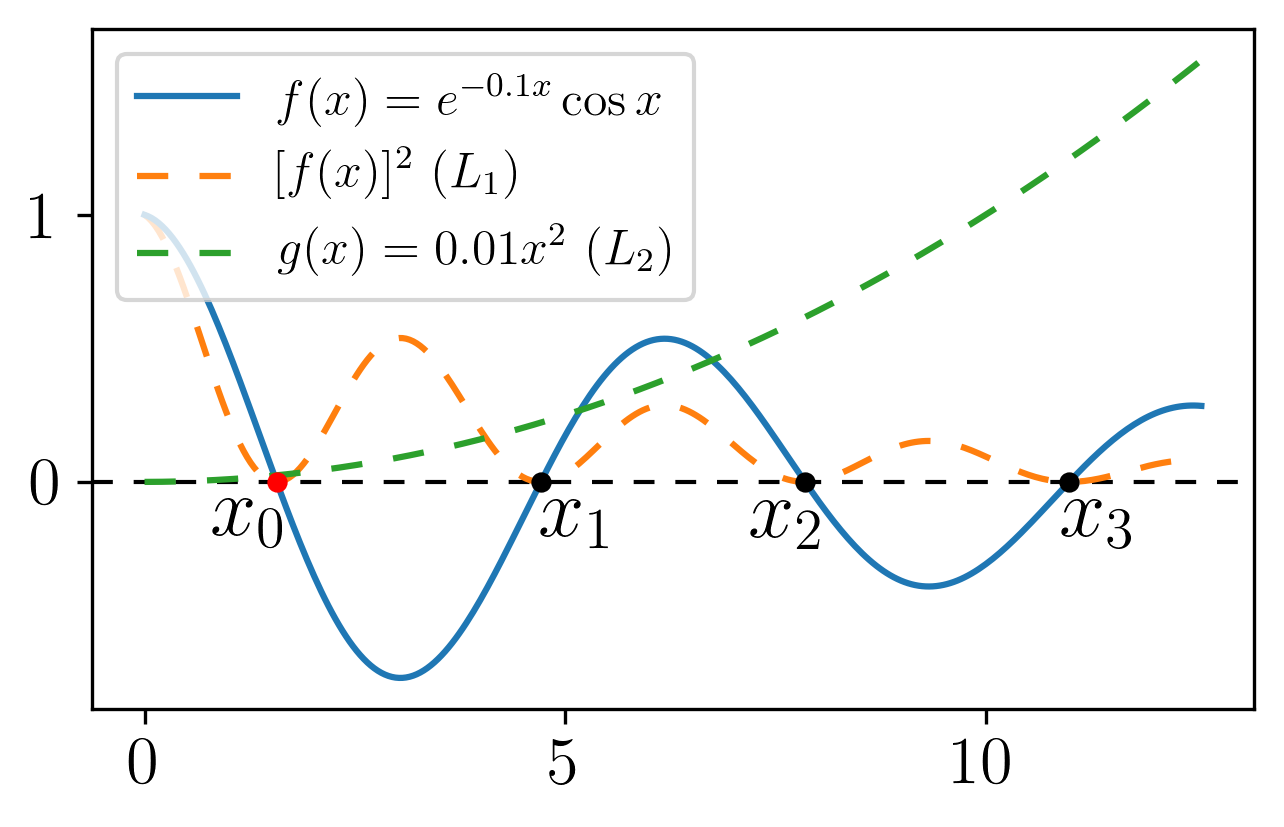

In [3]:
# lines
x = np.linspace(0, 4*np.pi, 300)
y = func(x)

# plot
plt.figure(figsize=(5,3))
ax = sns.lineplot(x=x, y=y, zorder=5, label='$f(x) = e^{-0.1x} \cos x$')
ax.plot(x, y**2, dashes=(5, 5), lw=1.5, zorder=4, label='$[f(x)]^2$ ($L_1$)')
ax.plot(x, 0.01 * (x**2), dashes=(5, 5), zorder=6, label='$g(x) = 0.01 x^2$ ($L_2$)')
ax.axhline(y=0, color='black', dashes=(5, 5), lw=1, zorder=0)
plt.scatter(np.pi/2, 0, s=15, color='red', zorder=10)
plt.scatter(3*np.pi/2, 0, s=15, color='black', zorder=10)
plt.scatter(5*np.pi/2, 0, s=15, color='black', zorder=10)
plt.scatter(7*np.pi/2, 0, s=15, color='black', zorder=10)
ax.legend(fontsize=12)
plt.text(0.8, -0.25, '$x_0$', fontsize=20, zorder=15)
plt.text(4.7, -0.25, '$x_1$', fontsize=20, zorder=15)
plt.text(7.2, -0.25, '$x_2$', fontsize=20, zorder=15)
plt.text(10.9, -0.25, '$x_3$', fontsize=20, zorder=15)
plt.savefig('../../figures/Example.pdf', dpi = 200)
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


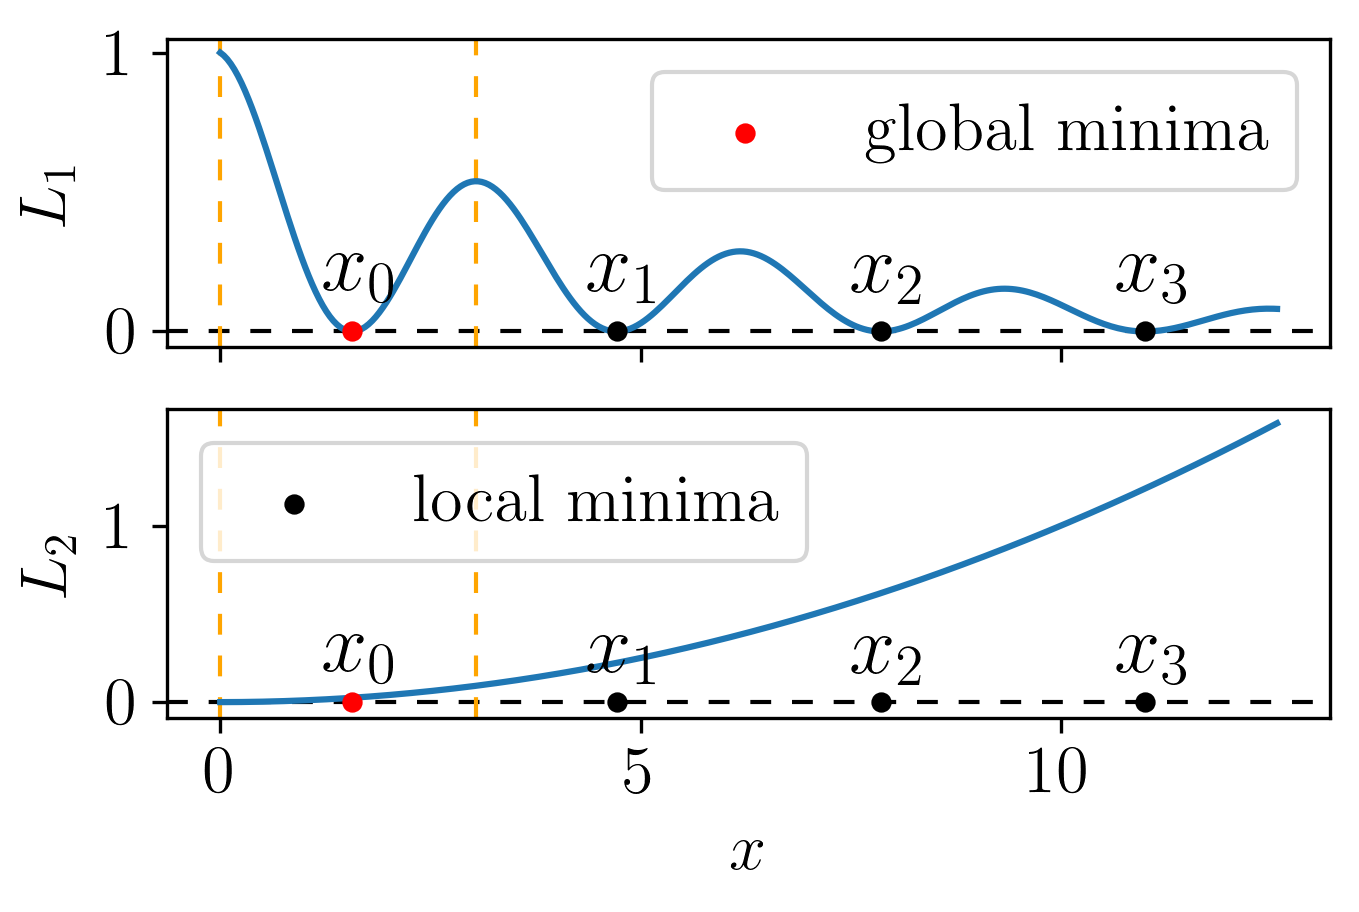

In [4]:
# lines
x = np.linspace(0, 4*np.pi, 300)
y = func(x)

# plot
fig, axs = plt.subplots(2, 1, figsize=(5,3))

ax = axs[0]
ax.plot(x, y**2, lw=1.5, zorder=4)
ax.axhline(y=0, color='black', dashes=(5, 5), lw=1, zorder=0)
ax.scatter(np.pi/2, 0, s=15, color='red', zorder=10, label="global minima")
ax.scatter(3*np.pi/2, 0, s=15, color='black', zorder=10)
ax.scatter(5*np.pi/2, 0, s=15, color='black', zorder=10)
ax.scatter(7*np.pi/2, 0, s=15, color='black', zorder=10)
ax.text(np.pi/2-0.35, 0.1, '$x_0$', fontsize=20, zorder=15)
ax.text(3*np.pi/2-0.35, 0.1, '$x_1$', fontsize=20, zorder=15)
ax.text(5*np.pi/2-0.35, 0.1, '$x_2$', fontsize=20, zorder=15)
ax.text(7*np.pi/2-0.35, 0.1, '$x_3$', fontsize=20, zorder=15)
ax.axvline(x=0, color='orange', dashes=(5, 5), lw=1, zorder=0)
ax.axvline(x=np.pi-0.1, color='orange', dashes=(5, 5), lw=1, zorder=0)
ax.set_ylabel("$L_1$")
ax.legend()

ax = axs[1]
ax.plot(x, 0.01 * (x**2), zorder=6)
ax.axhline(y=0, color='black', dashes=(5, 5), lw=1, zorder=0)
ax.scatter(np.pi/2, 0, s=15, color='red', zorder=10)
ax.scatter(3*np.pi/2, 0, s=15, color='black', zorder=10, label="local minima")
ax.scatter(5*np.pi/2, 0, s=15, color='black', zorder=10)
ax.scatter(7*np.pi/2, 0, s=15, color='black', zorder=10)
ax.text(np.pi/2-0.35, 0.1, '$x_0$', fontsize=20, zorder=15)
ax.text(3*np.pi/2-0.35, 0.1, '$x_1$', fontsize=20, zorder=15)
ax.text(5*np.pi/2-0.35, 0.1, '$x_2$', fontsize=20, zorder=15)
ax.text(7*np.pi/2-0.35, 0.1, '$x_3$', fontsize=20, zorder=15)
ax.axvline(x=0, color='orange', dashes=(5, 5), lw=1, zorder=0)
ax.axvline(x=np.pi-0.1, color='orange', dashes=(5, 5), lw=1, zorder=0)
ax.set_ylabel("$L_2$")
ax.set_xlabel("$x$")
ax.legend()

plt.setp(axs[0].get_xticklabels(), visible=False)
plt.show()
fig.savefig('../../figures/Example.pdf', dpi = 200)

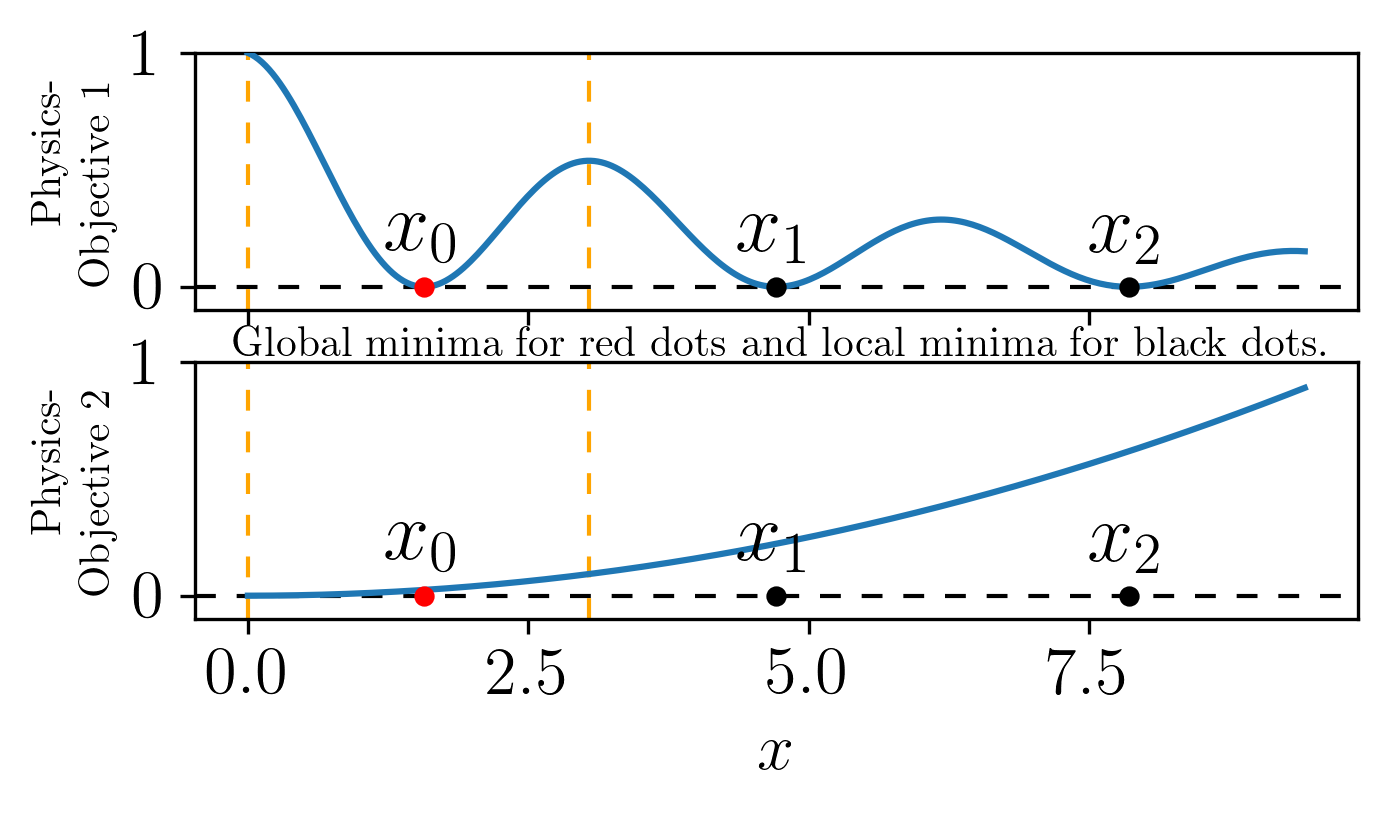

In [5]:
# lines
x = np.linspace(0, 3*np.pi, 300)
y = func(x)

# plot
fig, axs = plt.subplots(2, 1, figsize=(5,2.5))

ax = axs[0]
ax.plot(x, y**2, lw=1.5, zorder=4)
ax.axhline(y=0, color='black', dashes=(5, 5), lw=1, zorder=0)
ax.scatter(np.pi/2, 0, s=15, color='red', zorder=10, label="global minima")
ax.scatter(3*np.pi/2, 0, s=15, color='black', zorder=10)
ax.scatter(5*np.pi/2, 0, s=15, color='black', zorder=10)
# ax.scatter(7*np.pi/2, 0, s=15, color='black', zorder=10)
ax.text(np.pi/2-0.35, 0.1, '$x_0$', fontsize=20, zorder=15)
ax.text(3*np.pi/2-0.35, 0.1, '$x_1$', fontsize=20, zorder=15)
ax.text(5*np.pi/2-0.35, 0.1, '$x_2$', fontsize=20, zorder=15)
ax.axvline(x=0, color='orange', dashes=(5, 5), lw=1, zorder=0)
ax.axvline(x=np.pi-0.1, color='orange', dashes=(5, 5), lw=1, zorder=0)
ax.set_ylabel(r"Physics- \\ Objective 1", fontsize=10)
ax.set_ylim(-0.1, 1)

fig.text(0.15, 0.475, 'Global minima for red dots and local minima for black dots.', fontsize=10)

ax = axs[1]
ax.plot(x, 0.01 * (x**2), zorder=6)
ax.axhline(y=0, color='black', dashes=(5, 5), lw=1, zorder=0)
ax.scatter(np.pi/2, 0, s=15, color='red', zorder=10)
ax.scatter(3*np.pi/2, 0, s=15, color='black', zorder=10, label="local minima")
ax.scatter(5*np.pi/2, 0, s=15, color='black', zorder=10)
# ax.scatter(7*np.pi/2, 0, s=15, color='black', zorder=10)
ax.text(np.pi/2-0.35, 0.1, '$x_0$', fontsize=20, zorder=15)
ax.text(3*np.pi/2-0.35, 0.1, '$x_1$', fontsize=20, zorder=15)
ax.text(5*np.pi/2-0.35, 0.1, '$x_2$', fontsize=20, zorder=15)
ax.axvline(x=0, color='orange', dashes=(5, 5), lw=1, zorder=0)
ax.axvline(x=np.pi-0.1, color='orange', dashes=(5, 5), lw=1, zorder=0)
ax.set_ylabel(r"Physics- \\ Objective 2", fontsize=10)
ax.set_xlabel("$x$")
ax.set_ylim(-0.1, 1)

plt.setp(axs[0].get_xticklabels(), visible=False)
plt.show()
fig.savefig('../../figures/Example.pdf', dpi = 300)